In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
#import sklearn

df = pd.read_csv('loans_full_schema.csv')
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_59140\1806137017.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


#1 250-500 words explain what ML is and when to use it, and when not to.

Machine Learning(ML) is(broadly) a type of algorithm that makes predictions/creates an output, from within a 'black box', based on input 'features' or variables that relate to that output. Essentially ML algoriths take an input of a lot of data and finds patterns within it. There are many domains of machine learning algorithms, and they can be used in different ways for different tasks. Thought multiple types of ML algorithms can be used for the same task, usually there is a best model type for whatever the task it is being for. Machine learning can be classified into 3 main domains, with many variants within each domain. Supervised learning, Unsupervised learning, and reinforcement learning. Supervised learning is the most farmiliar form of ML for most people; a dataset is stripped of a certain category of data, then the ML algorithm tries to find paterns within that dataset, and predict the outcome of the stripped part of the data. Then the ML algorithm is graded based on it's accuracy by comparing it's predictions to the correct results of the data. Unsupervised ML algorithms operate similarly* but there is no defined set of correct answers to compare the results, and the algorithm isn't looking for a specific outcome, it is just finding patterns in data. Both of these types of ML can be further broken down into 4 categories: dimentionality reduction & clustering for unsupervised learning, regression & classification for supervised learning. These categories are largely used for either discrete datasets, or continuous datasets repectively. Reinforcement learnign is something that I comparitively know very little about, but I will give a short description. Reinforcement learning algorithms generally have control over something, the algorithm then randomly tries different actions within it's control, and it is either rewarded or punished for this action. There is generally a goal with these algorithms, though generally that goal is to simply complete a task. (I think Boston Dynamics might employ this in their robots? but I'm not sure about that.)

There are lots of problems that you could employ a ML algorithm to solve, and they often are used by groups with lots of resources to solve probelms. Machine learning algorithms require A LOT of resurces to run, namely data. Without incrediblly large datasets, ML algorithms are limited in their capacities. If you do have a lot of data though, they are very good at a lot of things, and (witht he right knowledge and expertise) can be applied to almost any problem in which you have a lot of data.

#2 Pre-Proccessing:
Name 3 different techniques that you will be using in this markdown, then implement in the code cell below

techniques:

ONE HOT ENCODING
split [homownership, initial_listing_status, verified_income, disbursement_method] into two columns. Get.dummies  (we can also do this manually)
Or assign arbitrary values '0' & '1' & '2' ect.... df.map or label encoder. map is preffered
Or for [initial_listing_status, disbursement_method] we can use boolean indexing since they are binary, same for [verified_income] if secured source = verified source

Create a df that lacks the joint columns, they aren't neccesary.
Or bool index them as False for NaN & True for else.
Or create a seperate df that is boolean sorted & keep the original

Subgrade is ordinal so we should be able to covnert to a value, assuming that A is the highest. we can put them in bins/empty lits depending on what 
letter they have. Then perform an operation on that list/df based on what letter it represents. EX: listA n  i*10^0, listB i*10^-1 ect... 
Thic could be automated and formated so that it is i*10^0-(ordinal letter), but manual is easier. 

Dealing with null: KNN could fill in nulls for emp_title ect... but I dont think that idea is helpful.
besides that, for this data there aren't any nulls in anything other than the joint_columns, which are dropped.



This is just a get_dummies function that I would apply to [homownership, initial_listing_status, verified_income, disbursement_method].

Doing it to so many columns may be an issue, but I see no good solution besides this.

This is a use of One-Hot Encoding

In [5]:
#2, code

def get_dummies(DATAFRAME,COLUMN): #This is just a get_dummies function, I am using it on 
    #[homownership, initial_listing_status, verified_income, disbursement_method]
    # This type of pre-prroccessing is called one-hot encoding
    """replaces column with the split version"""
    filler_df= pd.get_dummies(DATAFRAME[COLUMN])
    
    columns = list(filler_df.columns)
    
    for _ in columns:
    
        j = 0
        
        DATAFRAME.insert((DATAFRAME.columns.get_loc(COLUMN))+j,_,filler_df[_])
    
        j=+1
    
    DATAFRAME = DATAFRAME.drop(COLUMN, axis = 'columns')
    
    return DATAFRAME

get_dummies(df,'initial_listing_status')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,fractional,whole,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,False,True,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,False,True,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,True,False,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,False,True,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,False,True,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,Jan-2018,Current,False,True,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,Feb-2018,Current,False,True,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Feb-2018,Current,True,False,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,Feb-2018,Current,False,True,Cash,21518.12,2873.31,2481.88,391.43,0.0


This function turns sub_grade into integers. 

This function for converting ordinal values to int isn't very applicaple elsewhere, but with light modifications this function should be able to do any
ordinal value that is of the format 'A-Z''int'.

Im not sure what this kind of pre-processing is called

In [14]:
#2, code

def sub_grade_reverse(DATAFRAME,COLUMN): # This is converting the sub_grade column into int, LOWER IS BETTER
    #sub_grade is ordinal so this was simple enough
    #I'm not sure what you would call this kind of pre-proccessing

    alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ','$',',']
        
    i = 0
        
    while i < 29:
        DATAFRAME[COLUMN] = np.where(DATAFRAME[COLUMN].str.contains(alphabet[i]), DATAFRAME[COLUMN].str.replace(alphabet[i], str(i)), DATAFRAME[COLUMN])
            
        i += 1

    DATAFRAME[COLUMN] = [int(x) for x in DATAFRAME[COLUMN]]
    
    return DATAFRAME

sub_grade_reverse(df,'sub_grade')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,fractional,whole,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Current,False,True,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Current,False,True,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Current,True,False,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Current,False,True,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Current,False,True,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,Current,False,True,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,Current,False,True,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Current,True,False,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,Current,False,True,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


I though about making these functions, but it is literally built-in. I would change this if I though I would lose the extra credit points.

The first line is just dropping joint_columns, With such a high volume of null values, I'm not sure how valuble they are. 
I copied the original df so that you can still use the data.

The second function first saves the df, then turns the joint_columns into a binary. This on its own isnt super useful, 
but you could use it to make a new df of only married/joint loan applicants by making a new df of only those rows, then re-assign the values into that new df. Then you could drop these rows from the original df and compare the two.

In [ ]:
#2

backup_df = df.copy()

df = df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint'],axis=1)



#backup_df = df.copy()

#df[['annual_income_joint','verification_income_joint','debt_to_income_joint'] =
#df[['annual_income_joint','verification_income_joint','debt_to_income_joint'].isna()



In [22]:
df.head()

,emp_title,emp_length,state,MORTGAGE,OWN,RENT,homeownership,annual_income,Not Verified,Source Verified,...,whole,initial_listing_status,Cash,DirectPay,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,True,False,False,MORTGAGE,90000.0,False,False,...,True,whole,True,False,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,False,False,True,RENT,40000.0,True,False,...,True,whole,True,False,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,False,False,True,RENT,40000.0,False,True,...,False,fractional,True,False,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,False,False,True,RENT,30000.0,True,False,...,True,whole,True,False,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,False,False,True,RENT,35000.0,False,False,...,True,whole,True,False,Cash,21430.15,2324.65,1569.85,754.80,0.0


#3 create a correlation matrix, and a heatmap. Then write about the takeaways from the matrix.

Then use it to select max 10 feature for the ML model

Here are the best 'features' to use for a predictive model that predicts if someone will pay back their loan:

OWN                     0.013291 

annual_income           0.011982

earliest_credit_line    0.010356

total_credit_lines     0.018615  

accounts_opened_24m    0.037957

fractional             0.058835

all of these are horrible, but I find it unlikley that there are no features with any correlation, so I am assuming there is some issue comparing the data( Maybe a nonlinear relationshp?)



In [18]:
# I am droping non-numbers, I was making a function to do this, 
#and I will likely still need to do that in the future, but that took a painful amount of effort. And it still doesnt work
numbers_df = df.drop(['emp_title','verified_income','state','homeownership','verification_income_joint','disbursement_method','initial_listing_status'
                      ,'loan_status','issue_month','grade','loan_purpose','application_type',],axis=1)

numbers_df['loan_percent'] = numbers_df['paid_total']/numbers_df['loan_amount'] #how successful someone has been in paying back the loan

numbers_df.corr()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,installment,sub_grade,fractional,whole,balance,paid_total,paid_principal,paid_interest,paid_late_fees,loan_percent
emp_length,1.000000,0.096469,0.026157,0.071282,0.002103,0.008242,0.028790,-0.234408,0.003753,0.133472,...,0.075981,-0.032289,-0.021200,0.021200,0.086768,0.024246,0.018153,0.049517,0.001851,-0.015621
annual_income,0.096469,1.000000,-0.180445,0.724664,-0.179790,0.052236,-0.040392,-0.156001,0.090119,0.210163,...,0.315693,-0.101682,-0.050766,0.050766,0.280170,0.162005,0.141893,0.174154,-0.005318,0.011982
debt_to_income,0.026157,-0.180445,1.000000,-0.047284,0.348912,-0.027517,0.034637,-0.089700,0.025388,0.198647,...,0.066408,0.141327,0.009070,-0.009070,0.065996,-0.003918,-0.020116,0.121160,-0.010110,-0.031533
annual_income_joint,0.071282,0.724664,-0.047284,1.000000,-0.215504,0.046276,-0.049124,-0.175325,0.082176,0.240166,...,0.303795,-0.173752,-0.018655,0.018655,0.302291,0.108933,0.092761,0.120788,-0.002689,0.010672
debt_to_income_joint,0.002103,-0.179790,0.348912,-0.215504,1.000000,-0.029220,0.065376,-0.091637,0.029515,0.187683,...,0.079405,0.272599,0.004954,-0.004954,0.055566,0.001389,-0.025166,0.177931,-0.028840,-0.046507
delinq_2y,0.008242,0.052236,-0.027517,0.046276,-0.029220,1.000000,-0.566551,-0.078109,0.003152,0.068040,...,-0.013724,0.093368,0.032595,-0.032595,-0.031440,-0.004490,-0.006857,0.017165,-0.009404,0.002016
months_since_last_delinq,0.028790,-0.040392,0.034637,-0.049124,0.065376,-0.566551,1.000000,0.030064,0.022727,-0.014727,...,0.008274,-0.084362,0.003837,-0.003837,0.036517,-0.017350,-0.016431,-0.009362,0.005123,-0.029832
earliest_credit_line,-0.234408,-0.156001,-0.089700,-0.175325,-0.091637,-0.078109,0.030064,1.000000,0.042745,-0.294621,...,-0.100001,0.104953,0.024131,-0.024131,-0.107508,-0.040281,-0.036125,-0.037027,0.020522,0.010356
inquiries_last_12m,0.003753,0.090119,0.025388,0.082176,0.029515,0.003152,0.022727,0.042745,1.000000,0.210433,...,0.043704,0.132154,0.033946,-0.033946,0.026550,0.032823,0.023155,0.077204,0.022404,0.029343
total_credit_lines,0.133472,0.210163,0.198647,0.240166,0.187683,0.068040,-0.014727,-0.294621,0.210433,1.000000,...,0.157548,-0.046612,-0.035399,0.035399,0.158414,0.082315,0.068932,0.112342,-0.030621,0.018615


I could't read all the values for the matrix above, so I broke it down for legibility

In [26]:
print(numbers_df.corr())

                                  emp_length  MORTGAGE       OWN      RENT  \
emp_length                          1.000000  0.187324  0.042694 -0.220592   
MORTGAGE                            0.187324  1.000000 -0.379208 -0.759780   
OWN                                 0.042694 -0.379208  1.000000 -0.313503   
RENT                               -0.220592 -0.759780 -0.313503  1.000000   
annual_income                       0.096469  0.175323 -0.049504 -0.145138   
Not Verified                        0.011419 -0.054721  0.006539  0.051562   
Source Verified                    -0.046594 -0.003316 -0.005284  0.007116   
Verified                            0.042853  0.066372 -0.001278 -0.067215   
debt_to_income                      0.026157  0.071743 -0.008616 -0.067573   
annual_income_joint                 0.071282  0.176324 -0.066948 -0.146885   
debt_to_income_joint                0.002103 -0.003265  0.039617 -0.026642   
delinq_2y                           0.008242  0.034136  0.005881

This heat map isnt super useful as there are to many variables to get a clear piture of what is happening.

19x19 is the largest heatmap that data can be extrapolated from, though it still hints at where to look in the correlation matrix

<Axes: >

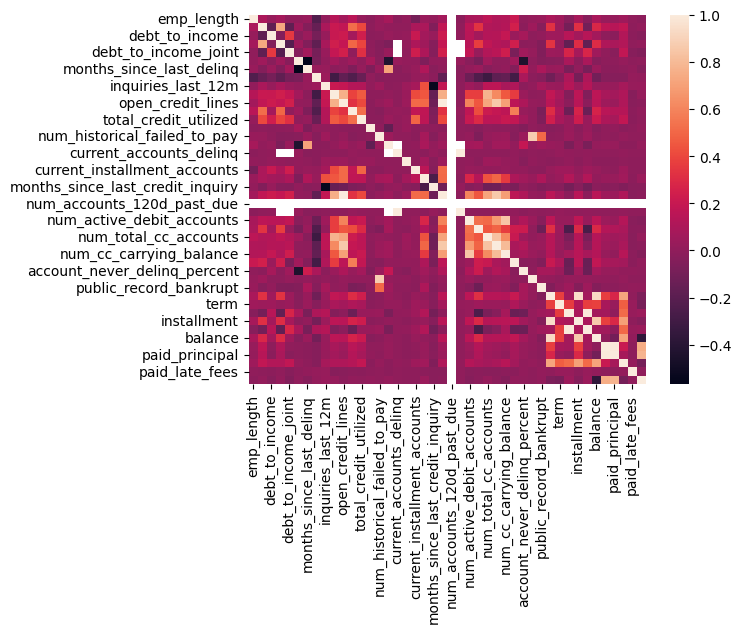

In [14]:
sns.heatmap(numbers_df.corr())

#4 make a box and whisker plot of the loan_amounts

How do you handle null value?

What do these plots show you?

I just dropped null values for this graph. There were relatively few, so I believe that this was a decent technique.

This graph shows that the median loan amount was around $14,000, though the normal range extended from 1,000-40,000

Text(0, 0.5, 'loan amount ($)')

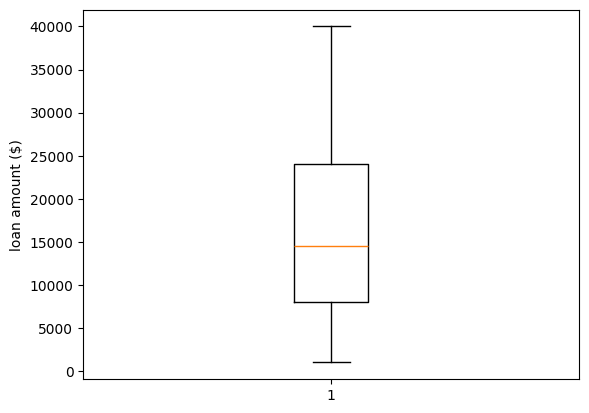

In [15]:
#4, code 
plt.boxplot(df['loan_amount'].dropna())
plt.ylabel('loan amount ($)')

#5 using a lambda function create a new column that divides where people live into Pacific, Plains, Midwest, Northeast, and South.

Create another lambda function/another function that does the same thing in a different way and use a timer to see which is better.

In [129]:
#5, code
start_time = time.time()

plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']
states2 = [northeast,south,midwest,plains,pacific]

lambda_func = lambda state: ("plains" if state in plains else 
                             ('northeast' if state in northeast else ('pacific' if state  in pacific else ('midwest' if state in midwest
                                                                                                          else 'south' if state in south
                                                                                                          else 'LOOK HERE'))))
df['region'] = df['state'].apply(lambda_func)
df.head()

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time elapsed: {elapsed_time} seconds')

Time elapsed: 0.015621423721313477 seconds


This does the same thing but in a clearer way, bulkier and slower though

In [126]:
start_time = time.time()

def states_by_region(DATAFRAME,COLUMN):
    plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
    pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
    midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
    northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
    south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']
    
    region_list = []
    
    tick = 0
    
    for i in DATAFRAME[COLUMN]:
        
        if i in plains:
            region_list.insert(tick,'plains')
        elif i in pacific:
            region_list.insert(tick,'pacific')
        elif i in midwest:
            region_list.insert(tick,'midwest')
        elif i in northeast:
            region_list.insert(tick,'northeast')
        elif i in south:
            region_list.insert(tick,'south')
        else:
            region_list.insert(tick,'LOOK HERE')
    
        tick=+1
    
    DATAFRAME['region'] = region_list
    
    return DATAFRAME.head()

states_by_region(df,'state')

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time elapsed: {elapsed_time} seconds')

Time elapsed: 0.04685616493225098 seconds


#6 Create a subplot histogram that shows if loan amounts differ by region

Explain findings in less than 200 words.

Text(0, 0.5, 'number of each loan value')

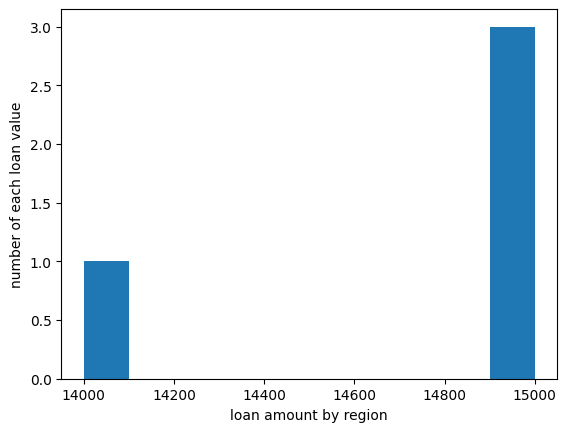

In [123]:
#6, code

plains_df = df[df['region'] == 'plains']
midwest_df = df[df['region'] == 'midwest']
northwest_df = df[df['region'] == 'northwest']
south_df = df[df['region'] == 'south']
pacific_df = df[df['region'] == 'pacific']

loan_by_region = [plains_df['loan_amount'].median(),
          midwest_df['loan_amount'].median(),
          northwest_df['loan_amount'].median(),
         south_df['loan_amount'].median(),
         pacific_df['loan_amount'].median()]

plt.hist(loan_by_region)
plt.xlabel('loan amount by region')
plt.ylabel('number of each loan value')

This histogram is horrible but I cannot find a way to make the y-axis the values, and the x-axis the bin labels. There is obviously a way to do this or it would be the worst plotting collection ever, but I cant find it. I also do not know why it somehow manages to only have 4 data points, despite me inputting 5, but I also cannot fix that either.

As for the findings, the loans are suprisingly similar be region. Of the 5 inputs, 3 are within $100 of eachother with only 1 outlier, and that outlier is still withing 1000 dollars of the rest. A box and whiskers plot could give us the the distribution of the data, if there is a skew we should use the mean value as opposed to the median for this comparison. As well, though this graph does not show it, the outlier is the 'south' region.

Week 7 quiz

I chose linear regression, I chose this because I am predicting a values between 0-1 'loan_percent' and the input data is continuous.

This approach gave poor results, though I believe that this might be more to do with the low correlation in the data, than with the apporach. As well, more preprccessing could be done to help find the best features for this model, Standardization is one type of preproccessing that this would defenitly benefit the model

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
corr_test = df[['fractional','accounts_opened_24m']]
corr_test.corr()

,fractional,accounts_opened_24m
fractional,1.000000,0.026511
accounts_opened_24m,0.026511,1.000000


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array(X_df[['fractional','accounts_opened_24m']])

y = np.array(numbers_df['loan_percent'])

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                 random_state=30)

In [23]:
X_df.drop('paid_total',axis=1)

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,term,interest_rate,installment,sub_grade,fractional,whole,balance,paid_principal,paid_interest,paid_late_fees
0,3.0,90000.0,18.01,NaN,NaN,0,38.0,2001,6,28,...,60,14.07,652.53,23,False,True,27015.86,984.14,1015.19,0.0
1,10.0,40000.0,5.04,NaN,NaN,0,NaN,1996,1,30,...,36,12.61,167.54,21,False,True,4651.37,348.63,150.49,0.0
2,3.0,40000.0,21.15,NaN,NaN,0,28.0,2006,4,31,...,36,17.09,71.40,31,True,False,1824.63,175.37,106.43,0.0
3,1.0,30000.0,10.16,NaN,NaN,0,NaN,2007,0,4,...,36,6.72,664.19,3,False,True,18853.26,2746.74,566.15,0.0
4,10.0,35000.0,57.96,57000.0,37.66,0,NaN,2008,7,22,...,36,14.07,786.87,23,False,True,21430.15,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,NaN,NaN,0,NaN,2008,5,44,...,36,7.35,744.90,4,False,True,21586.34,2413.66,556.14,0.0
9996,8.0,121000.0,32.38,NaN,NaN,4,9.0,1994,1,28,...,36,19.03,366.72,33,False,True,9147.44,852.56,603.75,0.0
9997,10.0,67000.0,45.26,107000.0,29.57,2,6.0,2004,0,18,...,36,23.88,1175.10,42,True,False,27617.65,2382.35,2238.45,0.0
9998,1.0,80000.0,11.99,NaN,NaN,0,NaN,1999,1,38,...,36,5.32,722.76,1,False,True,21518.12,2481.88,391.43,0.0


In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [30]:
pred_value = regression_model.predict(X_test)
pred_value

array([0.14925835, 0.14925835, 0.18176434, ..., 0.18548246, 0.17804623,
       0.17618717])

In [31]:
accuracy = regression_model.score(X_test,y_test)
print(accuracy)

0.004243109181952698
